In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
data = pd.read_csv("bank-additional-full.csv",sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [47]:
# our target variable is categorical in nature(yes/no)

In [48]:
data.shape

(41199, 21)

In [49]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [51]:
data['y'].value_counts()

no     36556
yes     4640
Name: y, dtype: int64

In [52]:
data['y']=np.where(data['y'] =='yes',1,0)
data['y']=data['y'].astype(int)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [54]:
data.isna().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 0
dtype: int64

In [55]:
column_list=list(data.columns)

In [56]:
column_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [57]:
column_list.remove('y')

In [58]:
column_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [59]:
for col in column_list:
    if data[col].dtypes == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].mean())

In [60]:
# mode [0] implies data is sorted with most frequent value occuring at 0th index so we want that value

In [61]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<Axes: xlabel='age'>

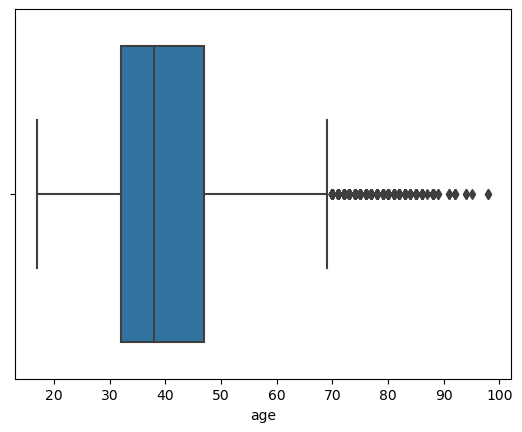

In [62]:
sns.boxplot(x = data['age'])

In [63]:
# dotted points are outliers.

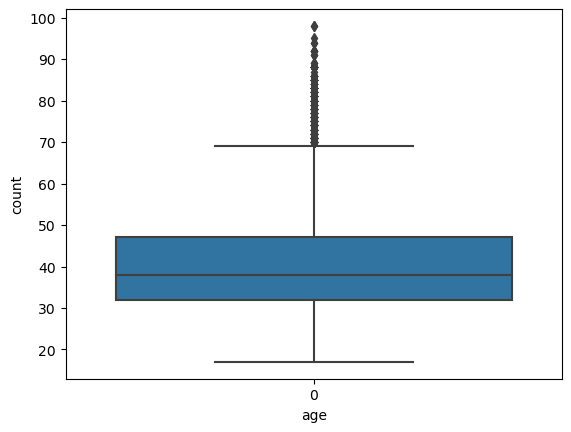

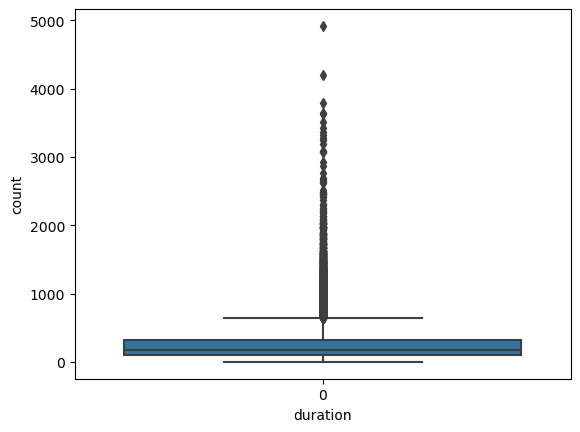

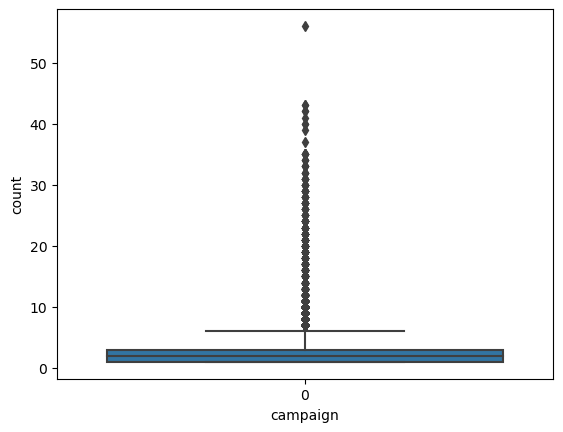

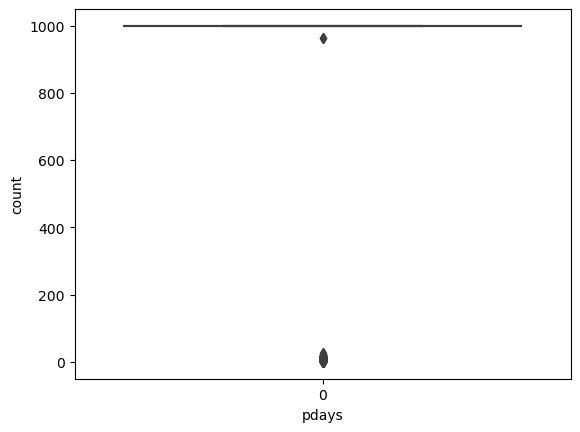

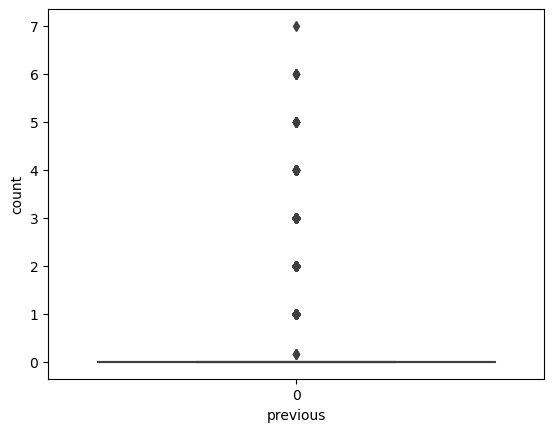

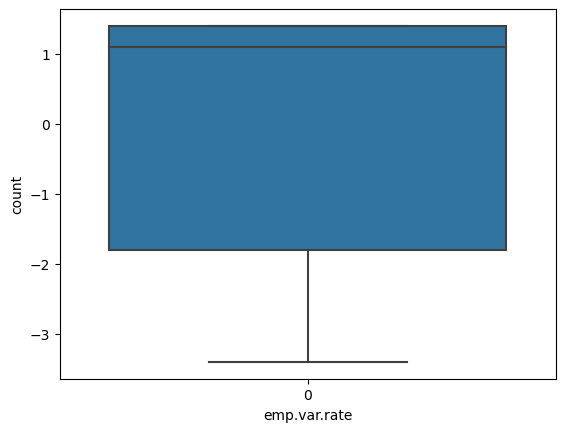

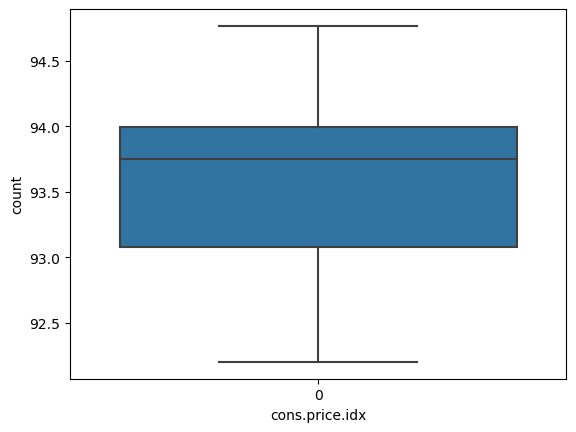

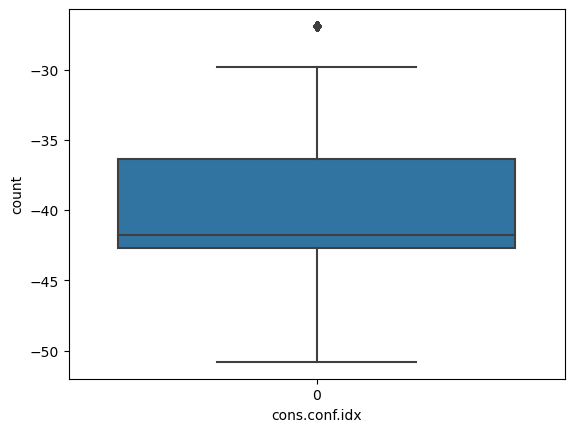

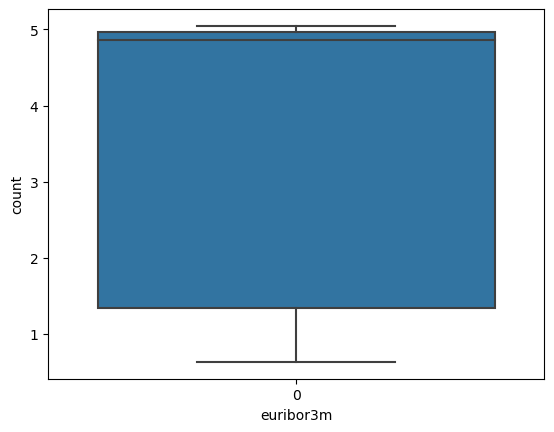

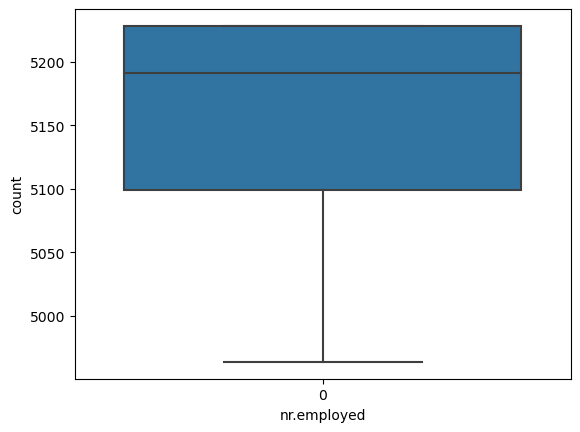

In [64]:
for col in column_list:
    if data[col].dtypes == 'int32' or data[col].dtypes == 'float64':
        sns.boxplot(data[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

In [65]:
Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.age>=Q1-1.5*IQR) & (data.age<= Q3+ 1.5*IQR)]

Q1 = data.duration.quantile(0.25)
Q3 = data.duration.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.duration>= Q1 - 1.5*IQR) & (data.duration<= Q3+ 1.5*IQR)]

Q1 = data.campaign.quantile(0.25)
Q3 = data.campaign.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.campaign >= Q1 - 1.5*IQR) & (data.campaign <= Q3 + 1.5*IQR)]

Q1 = data['cons.conf.idx'].quantile(0.25)
Q3 = data['cons.conf.idx'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['cons.conf.idx']>= Q1 - 1.5*IQR) & (data['cons.conf.idx']<= Q3 + 1.5* IQR)]


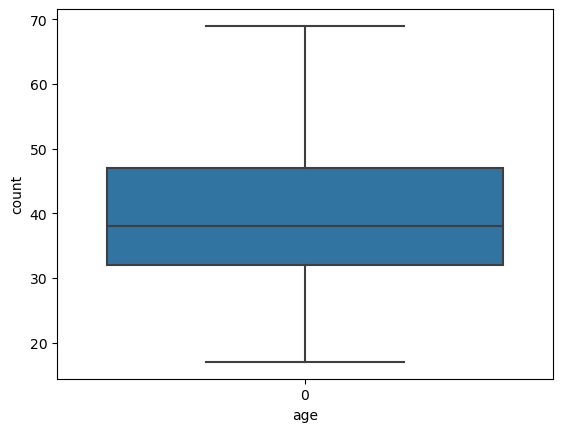

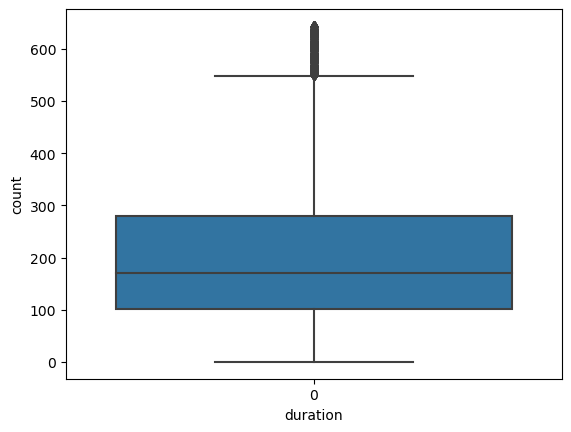

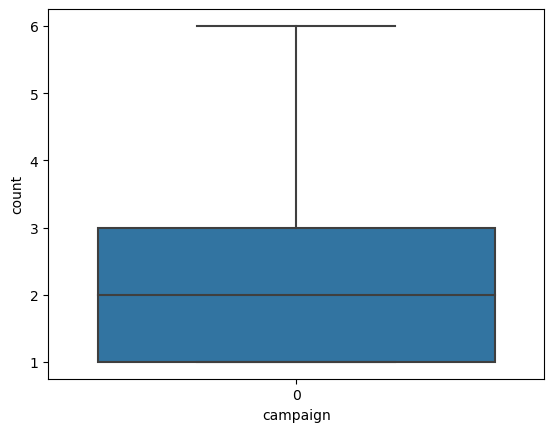

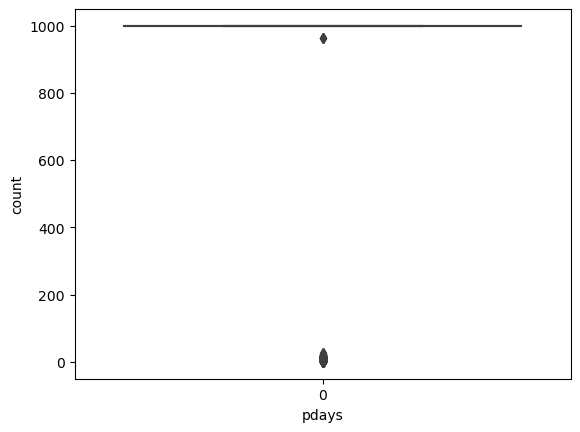

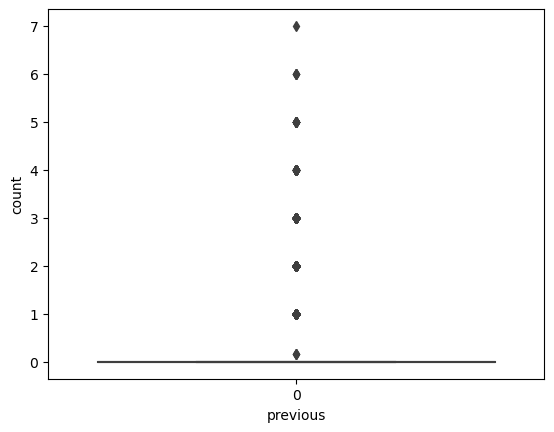

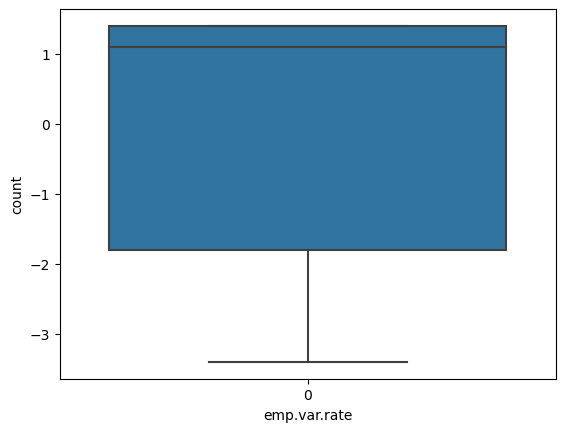

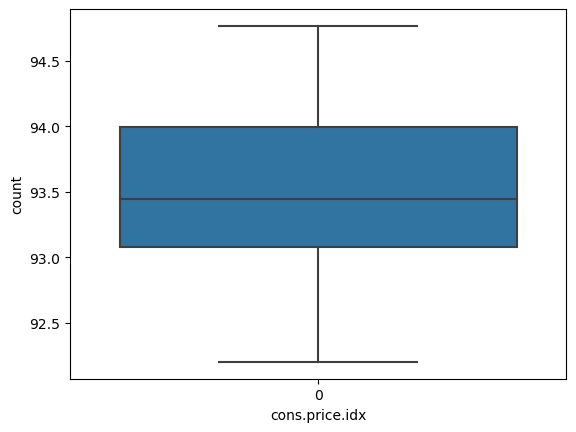

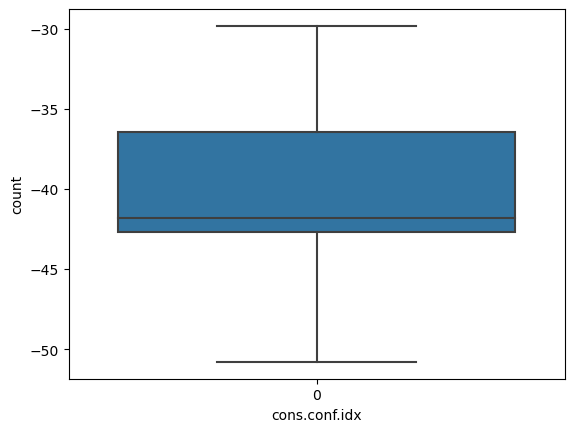

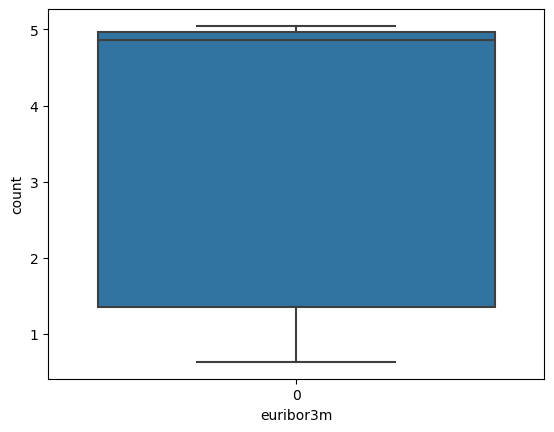

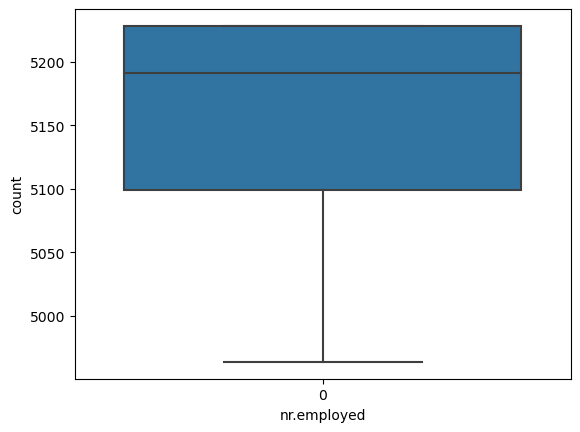

In [66]:
for col in column_list:
    if (data[col].dtypes == 'int32'or data[col].dtypes == 'float64'):
        sns.boxplot(data[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

In [67]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in column_list:
    data[i]= le.fit_transform(data[i])


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35180 entries, 0 to 41197
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             35180 non-null  int64
 1   job             35180 non-null  int32
 2   marital         35180 non-null  int32
 3   education       35180 non-null  int32
 4   default         35180 non-null  int32
 5   housing         35180 non-null  int32
 6   loan            35180 non-null  int32
 7   contact         35180 non-null  int32
 8   month           35180 non-null  int32
 9   day_of_week     35180 non-null  int32
 10  duration        35180 non-null  int64
 11  campaign        35180 non-null  int64
 12  pdays           35180 non-null  int64
 13  previous        35180 non-null  int64
 14  poutcome        35180 non-null  int32
 15  emp.var.rate    35180 non-null  int64
 16  cons.price.idx  35180 non-null  int64
 17  cons.conf.idx   35180 non-null  int64
 18  euribor3m       35180 non-

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list =[]
for col in data.columns:
    if((data[col].dtypes !='object') & (col !='y')):
        col_list.append(col)
        
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif_data


,feature,VIF
0,age,7.624350
1,job,2.100120
2,marital,5.631485
3,education,4.544351
4,default,1.409402
5,housing,2.211902
6,loan,1.207549
7,contact,4.933254
8,month,5.388832
9,day_of_week,3.097140


In [70]:
data=data.drop(['emp.var.rate'],axis = 1)

In [71]:
col_list =[]
for col in data.columns:
    if ((data[col].dtypes!='object') &(col !='y')):
        col_list.append(col)
        
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]

vif_data

,feature,VIF
0,age,7.600723
1,job,2.100119
2,marital,5.626138
3,education,4.544351
4,default,1.409399
5,housing,2.211545
6,loan,1.207485
7,contact,3.429429
8,month,5.388494
9,day_of_week,3.095314


In [72]:
data = data.drop(["euribor3m"],axis =1)

In [73]:
col_list = []
for col in data.columns:
    if ((data[col].dtypes != 'object') & (col != 'y')):
        col_list.append(col)
            
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(col_list))]

vif_data


,features,VIF
0,age,7.599000
1,job,2.099685
2,marital,5.625625
3,education,4.544025
4,default,1.406271
5,housing,2.211395
6,loan,1.207455
7,contact,3.415239
8,month,5.388348
9,day_of_week,3.094535


In [74]:
data = data.drop(['pdays'],axis = 1)

In [75]:
col_list = []

for col in data.columns:
    if ((data[col].dtypes != 'object') & (col != 'y')):
        col_list.append(col)
        
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(col_list))]

vif_data

,features,VIF
0,age,6.468427
1,job,2.083960
2,marital,4.785730
3,education,4.327691
4,default,1.406183
5,housing,2.156423
6,loan,1.204504
7,contact,3.341057
8,month,4.556820
9,day_of_week,3.034338


In [76]:
data = data.drop(['cons.price.idx'],axis = 1)

In [77]:
col_list = []

for col in data.columns:
    if((data[col].dtypes !='object') & (col != 'y')):
        col_list.append(col)
        
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(col_list))]

vif_data

,features,VIF
0,age,6.454526
1,job,2.082569
2,marital,4.772004
3,education,4.325614
4,default,1.402989
5,housing,2.156068
6,loan,1.204376
7,contact,2.176145
8,month,4.541257
9,day_of_week,3.032750


In [78]:
data = data.drop(['nr.employed'],axis = 1)

In [79]:
col_list = []

for col in data.columns:
    if ((data[col].dtypes != 'object') & (col != 'y')):
        col_list.append(col)
        
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(col_list))]

vif_data

,features,VIF
0,age,5.648129
1,job,2.071945
2,marital,4.491977
3,education,4.193047
4,default,1.375817
5,housing,2.138047
6,loan,1.201964
7,contact,2.132275
8,month,4.540083
9,day_of_week,2.934538


In [80]:
data = data.drop(['poutcome'],axis = 1)



In [81]:
col_list = []

for col in data.columns:
    if ((data[col].dtypes != 'object') & (col != 'y')):
        col_list.append(col)
        
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(col_list))]

vif_data

,features,VIF
0,age,5.188581
1,job,2.064274
2,marital,4.177756
3,education,4.095405
4,default,1.375684
5,housing,2.123590
6,loan,1.200857
7,contact,2.132139
8,month,4.450623
9,day_of_week,2.894532


In [82]:
vif_data.features

0               age
1               job
2           marital
3         education
4           default
5           housing
6              loan
7           contact
8             month
9       day_of_week
10         duration
11         campaign
12         previous
13    cons.conf.idx
Name: features, dtype: object

In [83]:
ind_feature = list(vif_data.features)

ind_feature

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'previous',
 'cons.conf.idx']

In [84]:
df_ind = data[ind_feature]

df_ind

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,cons.conf.idx
0,40,3,1,0,0,0,0,1,6,1,262,0,0,17
1,41,7,1,3,1,0,0,1,6,1,149,0,0,17
2,20,7,1,3,0,2,0,1,6,1,226,0,0,17
3,23,0,1,1,0,0,0,1,6,1,151,0,0,17
4,40,7,1,3,0,0,2,1,6,1,308,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41186,28,9,1,5,0,0,0,0,7,0,443,0,0,0
41188,24,0,1,6,0,2,0,0,6,2,259,2,1,10
41189,24,5,1,5,0,2,0,0,7,0,239,3,2,0
41191,24,0,1,6,0,2,0,0,6,2,259,2,1,10


In [85]:
df_dep = data['y']

df_dep

0        0
1        0
2        0
3        0
4        0
        ..
41186    1
41188    0
41189    0
41191    0
41197    0
Name: y, Length: 35180, dtype: int32

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_ind,df_dep,test_size = 0.2, random_state = 42)

In [88]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()

logistic_reg.fit(x_train,y_train)


C:\Users\gandh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
test_pred = logistic_reg.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,test_pred)

0.9206935758953951

In [94]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,test_pred)

array([[6394,   85],
       [ 473,   84]], dtype=int64)

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6479
           1       0.50      0.15      0.23       557

    accuracy                           0.92      7036
   macro avg       0.71      0.57      0.59      7036
weighted avg       0.90      0.92      0.90      7036

